# 데이터 재가공

### 병원 데이터 기준으로 정리
- '국가건강검진 판정기준 및 판정소견 표준화 연구' 연구보고서 확인

[건강검진 결과표 제대로 읽는 법](https://newsroom.daewoong.co.kr/archives/12328)


<!-- - 건강검진 결과표 제대로 읽는 법
https://newsroom.daewoong.co.kr/archives/12328 -->

< **체질량지수 BMI** > 

- 정상 : 18.5~24.9 kg/m2
- 과체중 : 25~29.9 kg/m2
- 저체중 : 18.5 kg/m2 미만
- 질환의심(비만): 30 kg/m2 이상

<!-- BMI 18.5 미만, 18.5∼24.9, 25∼29.9, 30 이상을 '정상B(경계)-정상A-정상B(경계)-질환의심'으로 표현해왔으나, 올해 1월부터는 '저체중-정상-과체중-비만'으로 바꿔 표기
https://www.yna.co.kr/view/AKR20180409045800017 -->

<!-- **허리둘레(cm)**
- 정상A: 남 90 미만 / 여 85 미만
- 질환의심: 남 90 이상/ 여 85 이상 -->

<!-- < **콜레스테롤** > - 제외
(1) HDL 콜레스테롤
- 성인 남자 : 40 mg/dL 이상 유지 정상
- 성인 여자 : 50 mg/dL 이상 유지 정상
=> 60 mg/dL 이상이면 심혈관보호효과
(2)LDL 콜레스테롤 : 130㎎/dL 미만 정상
 협심증, 당뇨병, 심근경색증, 말초혈관질환 등 있을 경우 => 100 mg/dL 미만(70mg/dL 미만이면 더 효과적)이 되도록 유지 -->

< **혈색소** >
- 성인 남자 : 13g/dl 이하 빈혈 진단
- 성인 여자 : 12g/dl 이하 빈혈 진단

< **공복 혈당** >
- 정상치 :  70~99 ㎎/ℓ 
- 당뇨병 진단 : 126 mg/dL 이상

< **AST, ALT** >
- AST : ~ 40 IU/L 정상
- ALT : ~ 40IU/L 정상

---

- **당뇨** : metformine- 또는 오메가3
- **간** :  우루사
- **빈혈** : 철분제
- **비만** :  시서스 또는 가르시니아(체중 감량에 큰 영향 없다는 연구결과가 있음)

## Data visualization

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 한글 글꼴 설정

In [3]:
# 한글 폰트 '나눔바른고딕' 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,581 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155514 files and d

In [3]:
plt.rc('font', family='NanumBarunGothic')

## 데이터 불러오기

In [4]:
import os

# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.
csv_path = '/content/drive/MyDrive/health/health_data.csv'
df2 = pd.read_csv(csv_path, encoding='cp949')

df = df2.copy()
pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 합니다.
df # 데이터를 확인합니다.

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,1.0,1.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,1.0,2.0,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,1.0,1.0,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,1.0,1.0,132.0,78.0,124.0,178.0,301.0,43.0,75.0,13.6,1.0,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,1.0,1.0,100.0,64.0,98.0,288.0,93.0,71.0,198.0,14.0,1.0,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,1.0,1.0,110.0,64.0,83.0,NaN,NaN,NaN,NaN,16.0,1.0,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,1.0,1.0,137.0,82.0,111.0,208.0,113.0,59.0,126.0,11.9,1.0,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [5]:
# dtypes를 통해 데이터 형식만 출력
# df.dtypes

# info를 통해 데이터의 크기, 형식, 메모리 사용량 등을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

In [6]:
# 1차 가공 : 사용하지 데이터 삭제
df.drop(['기준년도','가입자 일련번호','시도코드','허리둘레','시력(좌)','시력(우)','청력(좌)','청력(우)','수축기 혈압','이완기 혈압','구강검진 수검여부','치아우식증유무','치석','데이터 공개일자'], axis=1, inplace=True)

# sample, head, tail을 통해 데이터를 미리보기 합니다.
df.head()

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,1,9,165,60,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0
1,2,13,150,65,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0
2,2,12,155,55,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0
3,1,13,160,70,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0
4,2,12,155,50,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0


### 결측치 확인

In [7]:
# Null 값 여부 확인
df.isnull().sum()

성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
dtype: int64

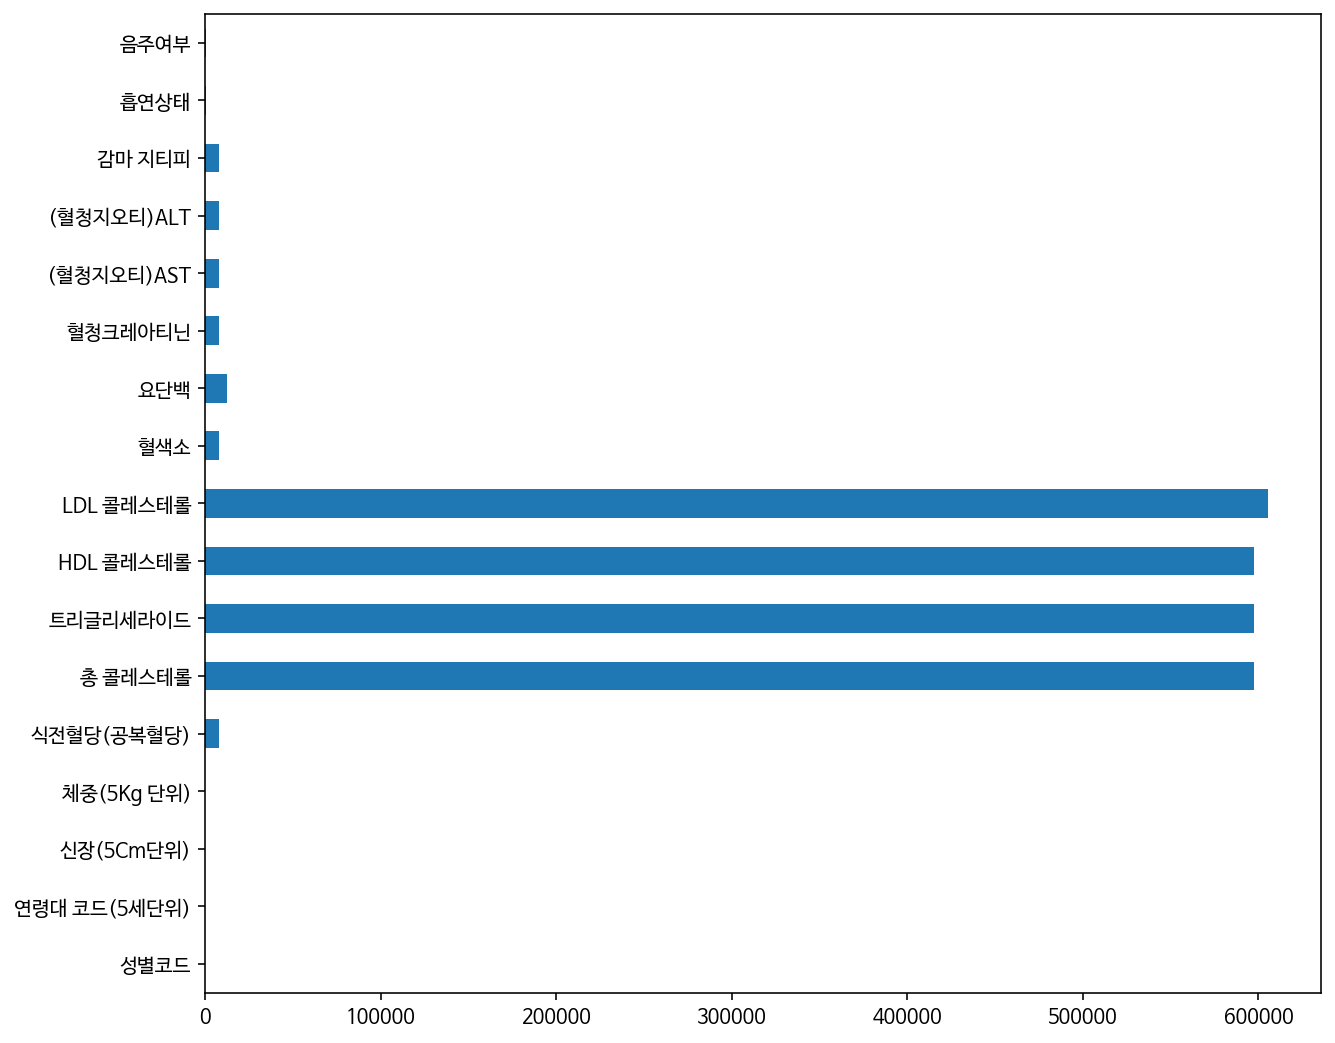

In [8]:
# 판다스에 내장 된 plot을 통해 시각화를 합니다.
df.isnull().sum().plot.barh(figsize=(10, 9))

In [9]:
# 총 콜레스테롤, 트리글리세라이드, HDL 콜레스테롤, LDL 콜레스테롤 : 결측치가 60%를 차지 - 제거
df.drop(['총 콜레스테롤','트리글리세라이드','HDL 콜레스테롤','LDL 콜레스테롤'], axis=1, inplace=True)
df.head()

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,1,9,165,60,90.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0
1,2,13,150,65,87.0,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0
2,2,12,155,55,102.0,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0
3,1,13,160,70,146.0,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0
4,2,12,155,50,110.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0


In [10]:
# NaN 값이 한개라도 존재하는 행 제거
df.dropna(axis=0, how='any', subset=['식전혈당(공복혈당)','혈색소','요단백','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','흡연상태','음주여부'], inplace=True)

In [11]:
# Null 값 여부 확인
df.isnull().sum()

성별코드            0
연령대 코드(5세단위)    0
신장(5Cm단위)       0
체중(5Kg 단위)      0
식전혈당(공복혈당)      0
혈색소             0
요단백             0
혈청크레아티닌         0
(혈청지오티)AST      0
(혈청지오티)ALT      0
감마 지티피          0
흡연상태            0
음주여부            0
dtype: int64

### 기초 통계 분석

In [12]:
# 기초 통계량을 살펴봅니다.
df.describe()

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
count,987332.000000,987332.000000,987332.000000,987332.000000,987332.000000,987332.000000,987332.000000,987332.000000,987332.000000,987332.000000,987332.000000,987332.000000,987332.000000
mean,1.487745,11.887434,161.032955,63.124030,104.247729,14.213121,1.122272,0.849609,27.702808,26.775007,37.790596,1.559448,0.588234
std,0.499850,2.150216,9.174430,12.266295,25.375361,1.551698,0.493362,0.340159,25.298569,25.845020,51.812427,0.784424,0.492153
min,1.000000,9.000000,130.000000,30.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,10.000000,155.000000,55.000000,91.000000,13.200000,1.000000,0.700000,20.000000,16.000000,16.000000,1.000000,0.000000
50%,1.000000,12.000000,160.000000,60.000000,99.000000,14.200000,1.000000,0.800000,24.000000,21.000000,24.000000,1.000000,1.000000
75%,2.000000,13.000000,170.000000,70.000000,109.000000,15.300000,1.000000,1.000000,30.000000,31.000000,40.000000,2.000000,1.000000
max,2.000000,18.000000,195.000000,135.000000,950.000000,25.000000,6.000000,95.000000,8712.000000,5990.000000,2630.000000,3.000000,1.000000


In [13]:
# 1,2로 되어있는 성별코드 0,1 로 변경 후 성별로 이름 변경 
df['성별코드'] = np.where(df['성별코드'] == 1, 0, 1)
df['성별'] = df['성별코드'].astype('object')
df.drop(['성별코드'], axis=1, inplace=True)

# 컬럼명 '연령대코드(5세단위)', '연령대'로 변경 
df['연령대'] = df['연령대 코드(5세단위)'].astype('object')
df.drop('연령대 코드(5세단위)', axis=1, inplace=True)

# 컬럼명 '신장(5Cm단위)', '신장'으로 변경
df['신장'] = df['신장(5Cm단위)'].astype('object')
df.drop(['신장(5Cm단위)'], axis=1, inplace=True)

# 컬러명 '체중(5Kg단위)', '체중'으로 변경
df['체중'] = df['체중(5Kg 단위)'].astype('object')
df.drop('체중(5Kg 단위)', axis=1, inplace=True)

In [14]:
obj_cols = df.select_dtypes('object').columns   # object 변수
obj_cols

Index(['성별', '연령대', '신장', '체중'], dtype='object')

## 데이터 가공
- BMI 계산(신장,체중)
- 연령대 -> 5단위에서 10단위 변경, '나이'로 이름 변경

**BMI**

In [15]:
df['bmi']=df['체중']/(df['신장']/100) ** 2
df['bmi']=df['bmi'].astype('float64')
df['bmi'] = df['bmi'].round(1)

In [16]:
# def class_bmi_div (bmi) :
#     if bmi < 18.5 :  # 18.5 미만
#         return "정상" # 저체중
#     elif 18.5 <= bmi < 23 :
#         return "정상" # 정상체중
#     elif 23 <= bmi < 25 :
#         return "비만" # 과체중
#     elif 25 <= bmi < 30 :  # 질환의심: 30 이상
#         return "비만" # 경도비만
#     elif 30 <= bmi < 35 :
#         return "비만" # 중정도비만
#     elif 35 <= bmi :
#         return "비만" # 고도비만
    
# def class_bmi_div_num (bmi) :
#     if bmi < 18.5 :
#         return 0 #"저체중"
#     elif 18.5 <= bmi < 23 :
#         return 1 #"정상체중"
#     elif 23 <= bmi < 25 :
#         return 2 #"과체중"
#     elif 25 <= bmi < 30 :
#         return 3 #"경도비만"
#     elif 30 <= bmi < 35 :
#         return 4 #"중정도비만"
#     elif 35 <= bmi :
#         return 5 #"고도비만"

    
# df['비만여부']=df['bmi'].apply(class_bmi_div)
# df['bmi_div']=df['bmi'].apply(class_bmi_div_num).astype('object')

In [17]:
# def class_bmi_num (bmi) :
#     if bmi < 25 :
#         return 0
#     elif bmi < 26.5 :
#         return 1
#     elif bmi < 28 :
#         return 2
#     elif bmi < 30 :
#         return 3
#     else :
#         return 4

# # df['BMI']=df['bmi'].apply(class_bmi_num).astype('object')

In [18]:
df.drop(['신장','체중'], axis=1, inplace=True)

**나이**

In [19]:
age_list = list(df['연령대'].unique())
age_list.sort()
age_list

[9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [20]:
# 연령 코드 딕셔너리 생성
# 5단위 -> 10단위 변경

age_code = {5 : 20,
            6 : 20,
            7 : 30,
            8 : 30,
            9 : 40,
            10 : 40,
            11 : 50,
            12 : 50,
            13 : 60,
            14 : 60,
            15 : 70,
            16 : 70,
            17 : 80,
            18 : 80
}

def func_1(row, age_code):
    return age_code[row]

df['나이'] = df['연령대'].apply(func_1, args = (age_code,))
# df.drop('연령대', axis=1, inplace=True)

In [21]:
# 전체의 데이터 타입을 확인합니다
df.dtypes

식전혈당(공복혈당)    float64
혈색소           float64
요단백           float64
혈청크레아티닌       float64
(혈청지오티)AST    float64
(혈청지오티)ALT    float64
감마 지티피        float64
흡연상태          float64
음주여부          float64
성별             object
연령대            object
bmi           float64
나이              int64
dtype: object

In [22]:
df.head()

,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,성별,연령대,bmi,나이
0,90.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,9,22.0,40
1,87.0,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,1,13,28.9,60
2,102.0,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,1,12,22.9,50
3,146.0,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,0,13,27.3,60
4,110.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,1,12,20.8,50


---

In [23]:
# 연령대(5세 단위), 나이(10세 단위) 중복이므로 연령대 컬럼 삭제
df.drop('연령대', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


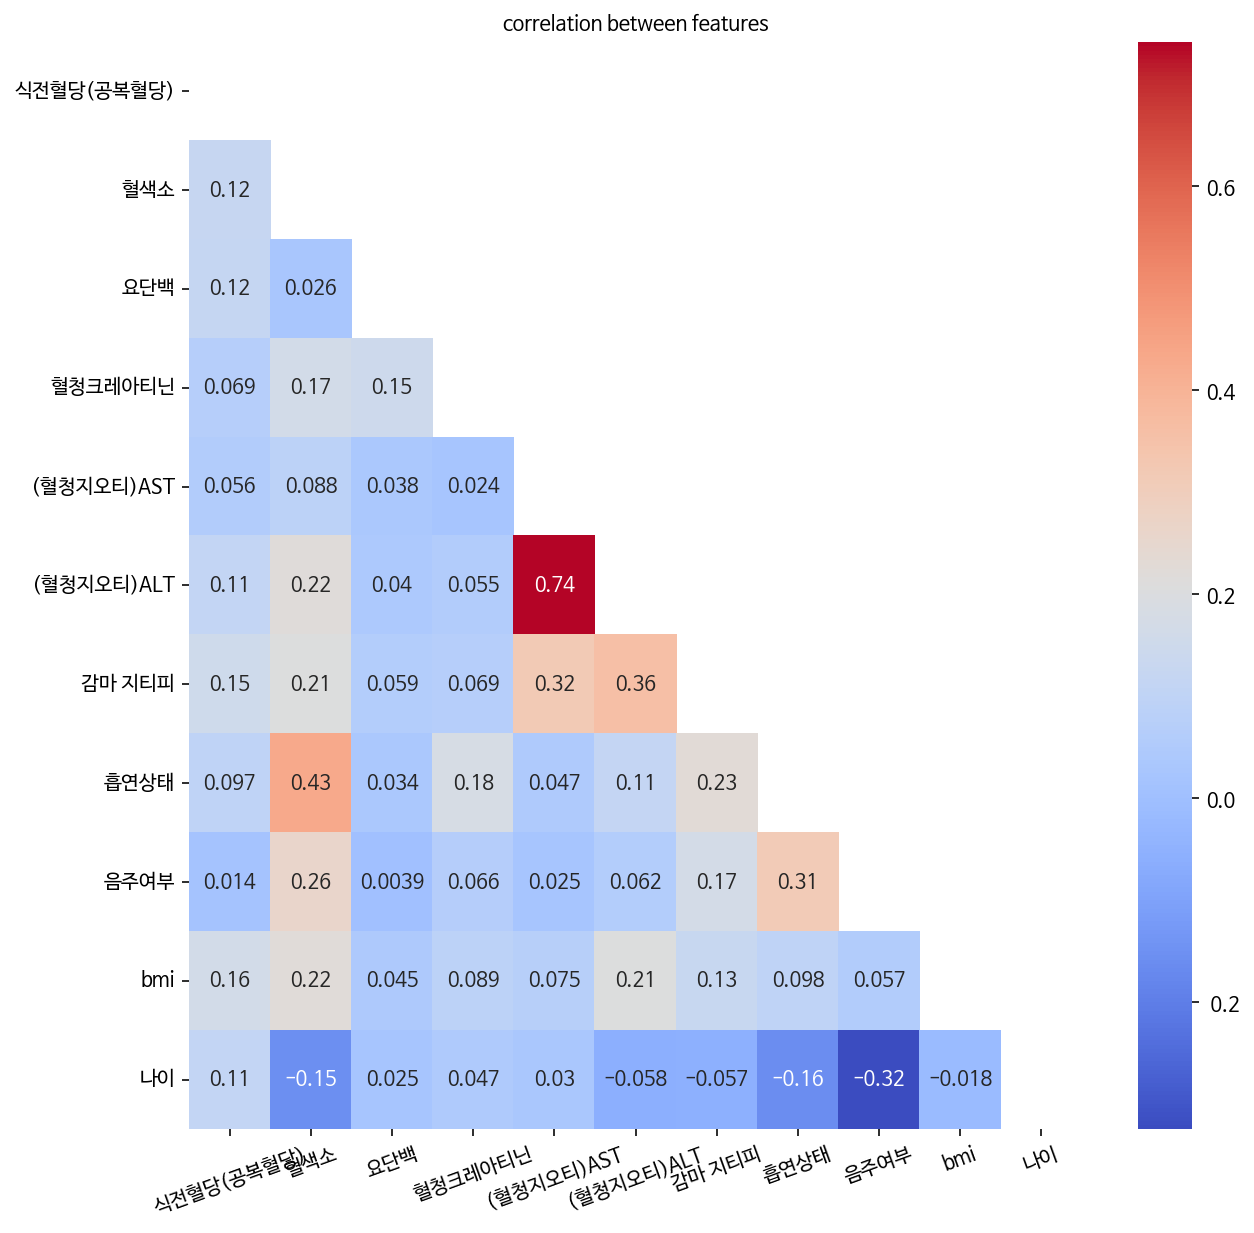

In [24]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환
corr_df = df.copy()
# corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(df().fit_transform)

#상관관계 분석도
plt.figure(figsize=(10,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=10, rotation=20)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=10)
plt.title('correlation between features', fontsize=10)
plt.show()

**간 수치 : 정상/비정상 판단 여부**

- AST와 ALT : 양의 상관관계 (74%)
- AST와 감마 지티피 : 양의 상관관계 (32%)
- ALT와 감마 지티피 : 양의 상관관계 (36%)


감마 지티피와 AST, 감마 지티피와 ALT와의 양의 상관관계가 30% 대이긴 하지만 상대적으로 AST와 ALT의 상관관계가 더 높으므로 두 가지를 가지고 간 수치의 정상, 비정상 여부 판단

+ 감마 지티피, AST, ATL : 알코올성 간질환 확인
+ 이상치 다루기 위해 음주여부 남겨두기

**음주여부, 흡연상태**
- 음주여부와 흡연상태가 밀접한 상관관계를 가진 항목이 없어보임
(흡연상태와 혈색소의 양의 상관관계가 43%이지만 빈혈 판단에 있어서 수치에 대하여 판단함)

In [25]:
df.head()

,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,성별,bmi,나이
0,90.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,22.0,40
1,87.0,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,1,28.9,60
2,102.0,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,1,22.9,50
3,146.0,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,0,27.3,60
4,110.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,1,20.8,50


In [26]:
## 2차 가공 : 사용하지 않는 데이터 삭제
df.drop(['요단백','혈청크레아티닌','흡연상태'], axis=1, inplace=True)  # - '감마 지티피', '음주여부'
df.head()

,식전혈당(공복혈당),혈색소,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,음주여부,성별,bmi,나이
0,90.0,15.0,21.0,27.0,21.0,0.0,0,22.0,40
1,87.0,12.7,18.0,15.0,15.0,0.0,1,28.9,60
2,102.0,12.8,27.0,25.0,7.0,0.0,1,22.9,50
3,146.0,16.4,65.0,97.0,72.0,0.0,0,27.3,60
4,110.0,12.4,18.0,17.0,14.0,0.0,1,20.8,50


In [27]:
df.tail()

,식전혈당(공복혈당),혈색소,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,음주여부,성별,bmi,나이
999995,124.0,13.6,21.0,25.0,18.0,0.0,1,26.2,60
999996,98.0,14.0,21.0,14.0,19.0,1.0,1,21.5,50
999997,83.0,16.0,26.0,20.0,17.0,1.0,0,22.9,40
999998,111.0,11.9,25.0,29.0,13.0,0.0,1,27.3,40
999999,121.0,14.9,17.0,13.0,24.0,0.0,0,21.5,50


### 정답레이블 생성

**BMI(비만여부)**

In [28]:
def class_bmi_div (bmi) :
    if bmi < 18.5 :  # 18.5 미만
        return "정상" # 저체중
    elif 18.5 <= bmi < 23 :
        return "정상" # 정상체중
    elif 23 <= bmi < 25 :
        return "비만" # 과체중
    elif 25 <= bmi < 30 :  # 질환의심: 30 이상
        return "비만" # 경도비만
    elif 30 <= bmi < 35 :
        return "비만" # 중정도비만
    elif 35 <= bmi :
        return "비만" # 고도비만

df['비만여부']=df['bmi'].apply(class_bmi_div)

In [29]:
(df['비만여부']=='비만').sum() # 과체중 포함 4가지 항목 -> '비만'으로 분류 (정상 : 저체중, 정상체중)

591520

In [30]:
(df['비만여부']=='정상').sum()

395812

**빈혈**

In [31]:
cond1 = (df['성별'] == '1')
cond2 = (df['혈색소'] < 12)
cond3 = (df['혈색소'] < 13)

df.loc[cond1&cond2, '빈혈여부'] = "빈혈" # 여자 and 혈색소 < 12 : 빈혈
df.loc[~cond1&~cond2, '빈혈여부'] = "빈혈 아님" # 여자 and 혈색소 >= 12 : 빈혈 아님
df.loc[~cond1&cond3, '빈혈여부'] = "빈혈" # 남자 and 혈색소 < 13 : 빈혈
df.loc[~cond1&~cond3, '빈혈여부'] = "빈혈 아님" # 남자 and 혈색소 >= 13 : 빈혈 아님 

df['빈혈여부']=df['빈혈여부'].astype('object')

In [32]:
# cond1 = (df['성별'] == '1') 
# cond2 = (df['혈색소'] < 12)
# cond3 = (df['혈색소'] < 13)

# df.loc[cond1&cond2, '빈혈여부'] = "빈혈" # 여자 and 혈색소 < 12 : 빈혈
# df.loc[~cond1&~cond2, '빈혈여부'] = "빈혈 아님" # 여자 and 혈색소 >= 12 : 빈혈 아님
# df.loc[~cond1&cond3, '빈혈여부'] = "빈혈" # 남자 and 혈색소 < 13 : 빈혈
# df.loc[~cond1&~cond3, '빈혈여부'] = "빈혈 아님" # 남자 and 혈색소 >= 13 : 빈혈 아님

In [33]:
(df['빈혈여부']=='빈혈').sum()

192724

In [34]:
(df['빈혈여부']=='빈혈 아님').sum()

794608

**당뇨**

In [35]:
# def trans(tr) :
#     if tr < 70 :
#         return 0 # 저혈당
#     elif 70 <= tr < 100 :
#         return 1 # 이상없음
#     elif 100 <= tr < 126 :
#         return 2 # 공복혈당장애
#                  # 100 ~ 110 : 100 미만 대비 당뇨병 위험도가 3.17배, 110 ~ 126 : 100 미만 대비 당뇨병 위험도가 7.42배
#     else :
#         return 3 # 당뇨병

# def trans_han(tr) :
#     if tr < 70 :
#         return "저혈당" # 저혈당
#     elif 70 <= tr < 100 :
#         return "정상" # 이상없음
#     elif 100 <= tr < 126 :
#         return "공복혈당장애" # 공복혈당장애
#                  # 100 ~ 110 : 100 미만 대비 당뇨병 위험도가 3.17배, 110 ~ 126 : 100 미만 대비 당뇨병 위험도가 7.42배
#     else :
#         return "당뇨병" # 당뇨병

In [36]:
def trans(tr) :
    if 70 <= tr < 100 :
        return "당뇨 없음" # 정상
    elif 100 <= tr < 126 :
        return "당뇨" # 비정상(공복혈당장애)
                 # 100 ~ 110 : 100 미만 대비 당뇨병 위험도가 3.17배, 110 ~ 126 : 100 미만 대비 당뇨병 위험도가 7.42배
    else :
        return "당뇨" # 당뇨병
        # 정상(저혈당, 정상) / 비정상(공복혈당장애, 당뇨병)

In [37]:
df['당뇨여부']=df['식전혈당(공복혈당)'].apply(trans).astype('object')

In [38]:
(df['당뇨여부']=='당뇨').sum()

472916

In [39]:
(df['당뇨여부']=='당뇨 없음').sum()

514416

In [40]:
# df.reset_index(drop=True,inplace=True)

In [41]:
# import warnings
# warnings.filterwarnings('ignore')

In [42]:
# for x in range(len(df['bmi'])):
#   if df['bmi'][x] < 18.5:
#     df['비만여부'][x] = '정상' # 저체중
#   elif 18.5 <= df['bmi'][x] <= 22.9:
#     df['비만여부'][x] = '정상' # 정상
#   elif 23 <= df['bmi'][x] <= 24.9: 
#     df['비만여부'][x] = '비만' # 비만전단계
#   elif 25 <= df['bmi'][x] <= 29.9:
#     df['비만여부'][x] = '비만' # 1단계 비만
#   elif 30 <= df['bmi'][x] <= 34.9:
#     df['비만여부'][x] = '비만' # 2단계 비만
#   elif df['bmi'][x] >= 35:
#     df['비만여부'][x] = '비만' # 3단계 미만
# df

In [43]:
df.tail()

,식전혈당(공복혈당),혈색소,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,음주여부,성별,bmi,나이,비만여부,빈혈여부,당뇨여부
999995,124.0,13.6,21.0,25.0,18.0,0.0,1,26.2,60,비만,빈혈 아님,당뇨
999996,98.0,14.0,21.0,14.0,19.0,1.0,1,21.5,50,정상,빈혈 아님,당뇨 없음
999997,83.0,16.0,26.0,20.0,17.0,1.0,0,22.9,40,정상,빈혈 아님,당뇨 없음
999998,111.0,11.9,25.0,29.0,13.0,0.0,1,27.3,40,비만,빈혈,당뇨
999999,121.0,14.9,17.0,13.0,24.0,0.0,0,21.5,50,정상,빈혈 아님,당뇨


**ALT**

In [44]:
cond1 = (df['(혈청지오티)ALT']<=40)
cond2 = ((df['(혈청지오티)ALT']>40)&(df['(혈청지오티)ALT']<=200))
cond3 = ((df['(혈청지오티)ALT']>200)&(df['(혈청지오티)ALT']<=400))
cond4 = (df['(혈청지오티)ALT']>400)

df.loc[cond1, 'ALT구분'] = '정상' # 정상
df.loc[cond2, 'ALT구분'] = '비정상' # 경도
df.loc[cond3, 'ALT구분'] = '비정상' # 중등도
df.loc[cond4, 'ALT구분'] = '비정상' # 중증

**AST**

In [45]:
cond1 = (df['(혈청지오티)AST']<=40)
cond2 = ((df['(혈청지오티)AST']>40)&(df['(혈청지오티)AST']<=200))
cond3 = ((df['(혈청지오티)AST']>200)&(df['(혈청지오티)AST']<=400))
cond4 = (df['(혈청지오티)AST']>400)

df.loc[cond1, 'AST구분'] = '정상'
df.loc[cond2, 'AST구분'] = '비정상'
df.loc[cond3, 'AST구분'] = '비정상'
df.loc[cond4, 'AST구분'] = '비정상'

**AST/ALT 비율**

In [46]:
df['AST/ALT비율'] = df['(혈청지오티)AST']/df['(혈청지오티)ALT'] # AST/ALT비율

**감마지티피/ALT비율**

In [47]:
df['GTP/ALT비율'] = df['감마 지티피']/df['(혈청지오티)ALT']

**알코올성 간질환 여부**

In [48]:
# AST/ALT비율 > 1
# 감마지티피/ALT > 2.5
# AST는 300을 넘지 않음
# ALT는 종종 정상
# AST/ALT비율이 2~3 이상인 경우 알코올성 간질환을 강하게 시사한다.

cond1 = ((df['AST/ALT비율']>1)&(df['GTP/ALT비율']>2.5)&(df['(혈청지오티)AST']<=300))

df.loc[cond1, '간 수치'] = '간 수치 높음'
df.loc[~cond1, '간 수치'] = '정상'

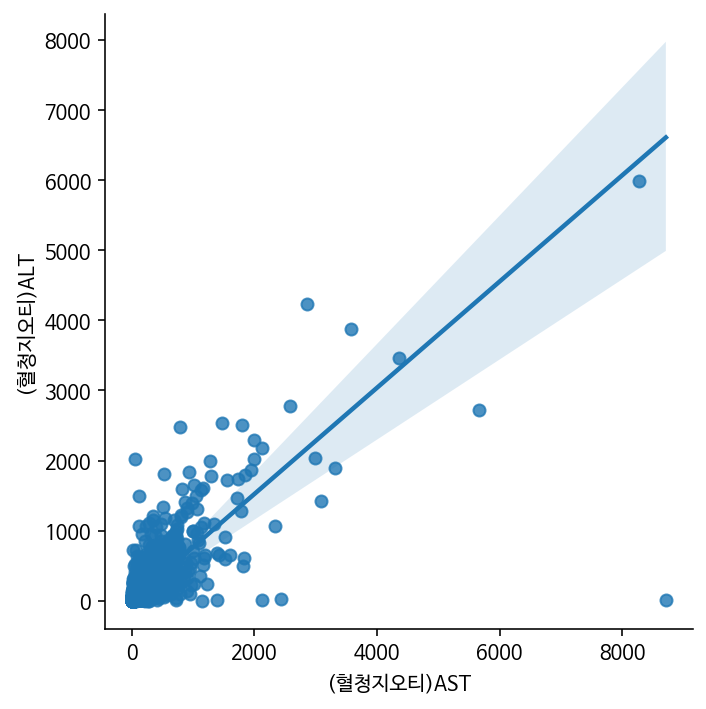

In [49]:
import seaborn as sns
ax = sns.lmplot(x="(혈청지오티)AST",y="(혈청지오티)ALT", data = df)

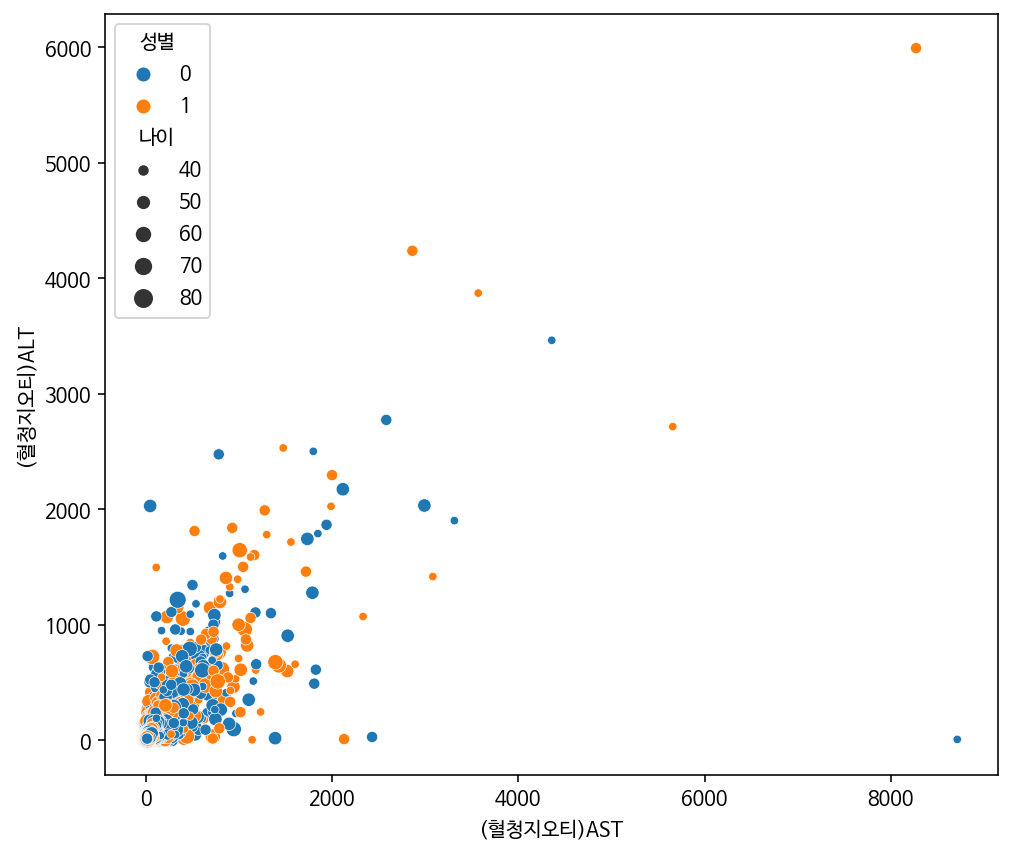

In [50]:
# scatterplot 으로 "(혈청지오티)AST", "(혈청지오티)ALT" 을 그리고 성별에 따라 다른 색상으로 표현되게 합니다.

plt.figure(figsize=(8, 7))
sns.scatterplot(data=df, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="성별", 
                size="나이")

### 이상치 다루기 - AST, ALT에 관해서 이상치 처리 필요

In [51]:
# "(혈청지오티)AST" 와 "(혈청지오티)ALT" 가 400 이하인 값만 데이터프레임 형태로 추출해서 
# df_ASLT 라는 변수에 담습니다.
df_ASLT = df[(df["(혈청지오티)AST"] < 400) & (df["(혈청지오티)ALT"] < 400)]

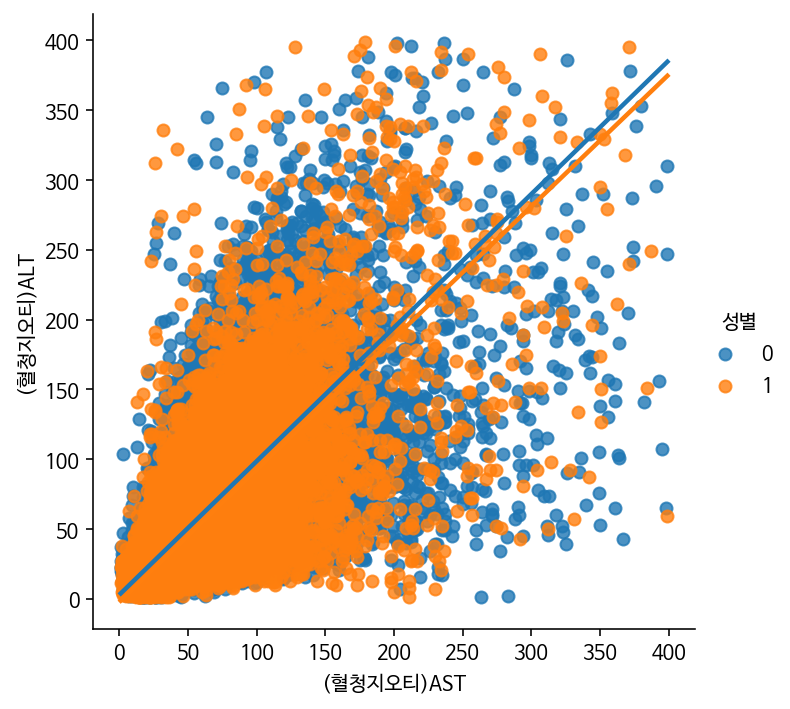

In [52]:
# 이상치를 제거한 "(혈청지오티)AST" 와 "(혈청지오티)ALT" 를 lmplot으로 그리며 
# 음주여부에 따라 다른 색으로 표현합니다.

sns.lmplot(data=df_ASLT,  x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="성별", ci=None)

In [53]:
# "(혈청지오티)AST" 와 "(혈청지오티)ALT" 가 400 이상인 값만 데이터프레임 형태로 추출해서 
# df_ASLT_high 라는 변수에 담습니다.

df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) |
                         (df["(혈청지오티)ALT"] > 400)]

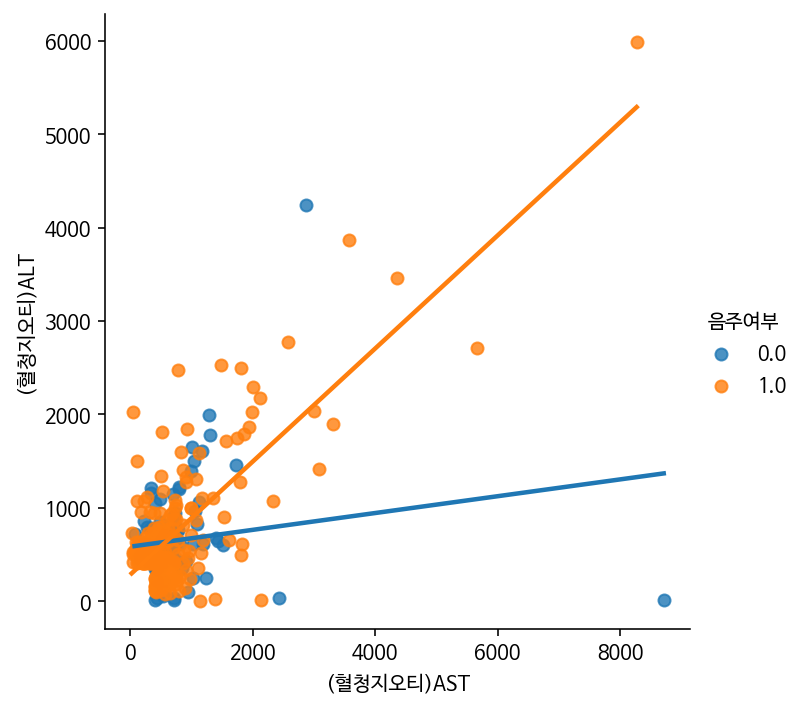

In [54]:
# 위에서 구한 df_ASLT_high 데이터 프레임에 담겨진 혈청지오티가 높은 데이터만 따로 봅니다.

sns.lmplot(data=df_ASLT_high,  x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [55]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]
df_ASLT_high_8000.iloc[:, 10:21]

,빈혈여부,당뇨여부,ALT구분,AST구분,AST/ALT비율,GTP/ALT비율,간 수치
113014,빈혈 아님,당뇨,정상,비정상,1452.000000,11.833333,정상
310369,빈혈 아님,당뇨 없음,비정상,비정상,1.380634,0.059265,정상


In [56]:
# 수치형 데이터로 된 컬럼을 찾기 위해 컬럼명만 따로 출력합니다.

df.columns

Index(['식전혈당(공복혈당)', '혈색소', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '음주여부', '성별',
       'bmi', '나이', '비만여부', '빈혈여부', '당뇨여부', 'ALT구분', 'AST구분', 'AST/ALT비율',
       'GTP/ALT비율', '간 수치'],
      dtype='object')

In [57]:
(df['AST구분']=='정상').sum()

896179

In [58]:
(df['AST구분']=='비정상').sum()

91153

In [59]:
(df['ALT구분']=='정상').sum()

856167

In [60]:
(df['ALT구분']=='비정상').sum()

131165

In [61]:
((df['AST구분'] == '정상') ^ (df['ALT구분']== '정상')).sum()

91984

In [62]:
((df['AST구분'] == '정상') & (df['ALT구분']== '정상')).sum()

830181

In [63]:
((df['AST구분'] == '비정상') & (df['ALT구분']== '비정상')).sum()

65167

In [64]:
df.tail()

,식전혈당(공복혈당),혈색소,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,음주여부,성별,bmi,나이,비만여부,빈혈여부,당뇨여부,ALT구분,AST구분,AST/ALT비율,GTP/ALT비율,간 수치
999995,124.0,13.6,21.0,25.0,18.0,0.0,1,26.2,60,비만,빈혈 아님,당뇨,정상,정상,0.840000,0.720000,정상
999996,98.0,14.0,21.0,14.0,19.0,1.0,1,21.5,50,정상,빈혈 아님,당뇨 없음,정상,정상,1.500000,1.357143,정상
999997,83.0,16.0,26.0,20.0,17.0,1.0,0,22.9,40,정상,빈혈 아님,당뇨 없음,정상,정상,1.300000,0.850000,정상
999998,111.0,11.9,25.0,29.0,13.0,0.0,1,27.3,40,비만,빈혈,당뇨,정상,정상,0.862069,0.448276,정상
999999,121.0,14.9,17.0,13.0,24.0,0.0,0,21.5,50,정상,빈혈 아님,당뇨,정상,정상,1.307692,1.846154,정상


In [65]:
# df.drop(['(혈청지오티)AST','(혈청지오티)ALT','감마 지티피','음주여부','ALT구분','AST구분','GTP/ALT비율'], axis=1, inplace=True)
# df.head()

---

In [67]:
df = df[['성별','나이','bmi','비만여부','혈색소','빈혈여부','식전혈당(공복혈당)','당뇨여부','(혈청지오티)AST','AST구분','(혈청지오티)ALT','ALT구분','AST/ALT비율','감마 지티피','GTP/ALT비율','음주여부','간 수치']]
df

,성별,나이,bmi,비만여부,혈색소,빈혈여부,식전혈당(공복혈당),당뇨여부,(혈청지오티)AST,AST구분,(혈청지오티)ALT,ALT구분,AST/ALT비율,감마 지티피,GTP/ALT비율,음주여부,간 수치
0,0,40,22.0,정상,15.0,빈혈 아님,90.0,당뇨 없음,21.0,정상,27.0,정상,0.777778,21.0,0.777778,0.0,정상
1,1,60,28.9,비만,12.7,빈혈,87.0,당뇨 없음,18.0,정상,15.0,정상,1.200000,15.0,1.000000,0.0,정상
2,1,50,22.9,정상,12.8,빈혈,102.0,당뇨,27.0,정상,25.0,정상,1.080000,7.0,0.280000,0.0,정상
3,0,60,27.3,비만,16.4,빈혈 아님,146.0,당뇨,65.0,비정상,97.0,비정상,0.670103,72.0,0.742268,0.0,정상
4,1,50,20.8,정상,12.4,빈혈,110.0,당뇨,18.0,정상,17.0,정상,1.058824,14.0,0.823529,0.0,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,60,26.2,비만,13.6,빈혈 아님,124.0,당뇨,21.0,정상,25.0,정상,0.840000,18.0,0.720000,0.0,정상
999996,1,50,21.5,정상,14.0,빈혈 아님,98.0,당뇨 없음,21.0,정상,14.0,정상,1.500000,19.0,1.357143,1.0,정상
999997,0,40,22.9,정상,16.0,빈혈 아님,83.0,당뇨 없음,26.0,정상,20.0,정상,1.300000,17.0,0.850000,1.0,정상
999998,1,40,27.3,비만,11.9,빈혈,111.0,당뇨,25.0,정상,29.0,정상,0.862069,13.0,0.448276,0.0,정상


In [69]:
df.to_csv('health_data.csv',index=False)

---

### 성별 분류(남성/여성)

In [ ]:
# # 성별로 분류(남성)
# man = df[df["성별"] == 0].reset_index(drop=True)
# print(man.shape)
# man.head()

In [ ]:
# # 성별로 분류(여성)
# woman = df[df["성별"] == 1].reset_index(drop=True)
# print(woman.shape)
# woman.head()